## EDA on E-Commerce Sales Analysis

In [2]:
import pandas as pd
import numpy as np
import matplotlib 
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
df = pd.read_csv('ecommerce_sales_analysis.csv')
df.head()

,product_id,product_name,category,price,review_score,review_count,sales_month_1,sales_month_2,sales_month_3,sales_month_4,sales_month_5,sales_month_6,sales_month_7,sales_month_8,sales_month_9,sales_month_10,sales_month_11,sales_month_12
0,1,Product_1,Clothing,190.40,1.7,220,479,449,92,784,604,904,446,603,807,252,695,306
1,2,Product_2,Home & Kitchen,475.60,3.2,903,21,989,861,863,524,128,610,436,176,294,772,353
2,3,Product_3,Toys,367.34,4.5,163,348,558,567,143,771,409,290,828,340,667,267,392
3,4,Product_4,Toys,301.34,3.9,951,725,678,59,15,937,421,670,933,56,157,168,203
4,5,Product_5,Books,82.23,4.2,220,682,451,649,301,620,293,411,258,854,548,770,257


In [6]:
print("\nNumber of rows and columns:")
print(df.shape)


Number of rows and columns:
(1000, 18)


In [7]:
print("\nSummary statistics:")
print(df.describe())


Summary statistics:
        product_id        price  review_score  review_count  sales_month_1  \
count  1000.000000  1000.000000   1000.000000   1000.000000    1000.000000   
mean    500.500000   247.677130      3.027600    526.506000     498.306000   
std     288.819436   144.607983      1.171243    282.269932     289.941478   
min       1.000000     7.290000      1.000000      1.000000       0.000000   
25%     250.750000   121.810000      2.000000    283.750000     245.500000   
50%     500.500000   250.920000      3.100000    543.000000     507.500000   
75%     750.250000   373.435000      4.000000    772.000000     740.750000   
max    1000.000000   499.860000      5.000000    999.000000    1000.000000   

       sales_month_2  sales_month_3  sales_month_4  sales_month_5  \
count    1000.000000    1000.000000    1000.000000    1000.000000   
mean      507.661000     506.739000     503.823000     487.194000   
std       285.992689     294.010873     286.645567     287.844324   


In [8]:
print("\nMissing values:")
print(df.isnull().sum())


Missing values:
product_id        0
product_name      0
category          0
price             0
review_score      0
review_count      0
sales_month_1     0
sales_month_2     0
sales_month_3     0
sales_month_4     0
sales_month_5     0
sales_month_6     0
sales_month_7     0
sales_month_8     0
sales_month_9     0
sales_month_10    0
sales_month_11    0
sales_month_12    0
dtype: int64


In [9]:
print("\nMissing values after handling:")
print(df.isnull().sum())


Missing values after handling:
product_id        0
product_name      0
category          0
price             0
review_score      0
review_count      0
sales_month_1     0
sales_month_2     0
sales_month_3     0
sales_month_4     0
sales_month_5     0
sales_month_6     0
sales_month_7     0
sales_month_8     0
sales_month_9     0
sales_month_10    0
sales_month_11    0
sales_month_12    0
dtype: int64


In [10]:
print("\nNumber of duplicate rows:")
print(df.duplicated().sum())


Number of duplicate rows:
0


## Exploratory analysis & visualization

In [11]:
df['total_sales'] = df.loc[:, 'sales_month_1':'sales_month_12'].sum(axis=1)

In [12]:
numeric_columns = ['price', 'review_score', 'review_count','total_sales']
print(df[numeric_columns].describe())

             price  review_score  review_count  total_sales
count  1000.000000   1000.000000   1000.000000  1000.000000
mean    247.677130      3.027600    526.506000  6019.912000
std     144.607983      1.171243    282.269932   992.273787
min       7.290000      1.000000      1.000000  2972.000000
25%     121.810000      2.000000    283.750000  5392.000000
50%     250.920000      3.100000    543.000000  5992.000000
75%     373.435000      4.000000    772.000000  6680.000000
max     499.860000      5.000000    999.000000  9151.000000


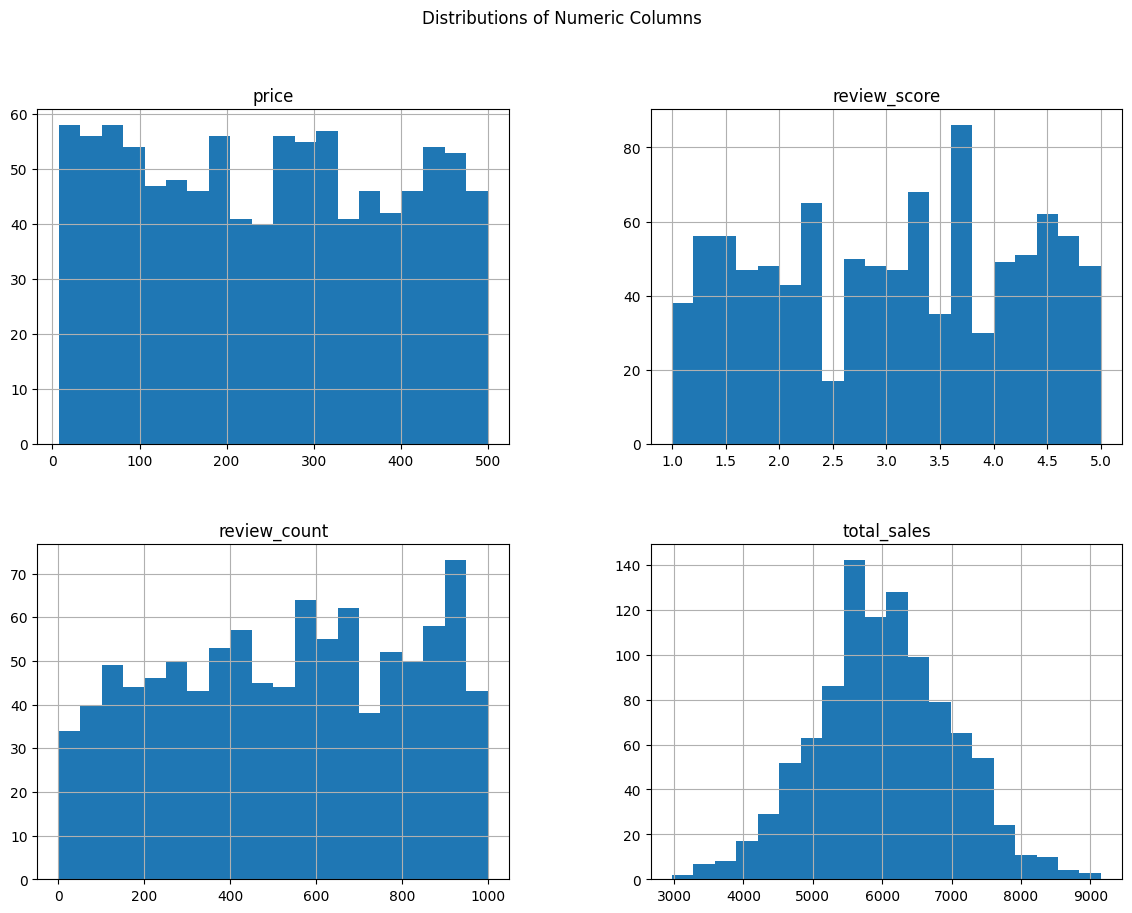

In [13]:
numeric_columns = ['price', 'review_score', 'review_count', 'total_sales']
df[numeric_columns].hist(bins=20, figsize=(14, 10), layout=(2, 2))
plt.suptitle('Distributions of Numeric Columns')
plt.show()

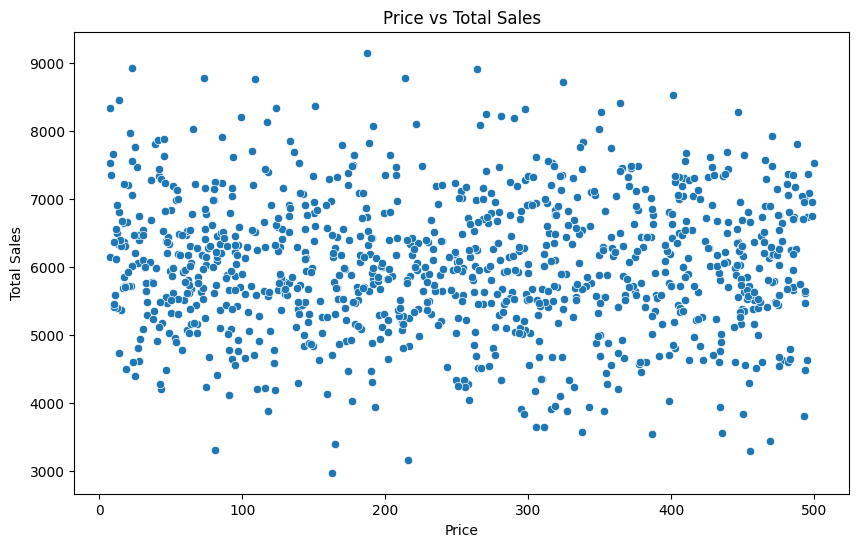

In [14]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='price', y='total_sales')
plt.title('Price vs Total Sales')
plt.xlabel('Price')
plt.ylabel('Total Sales')
plt.show()

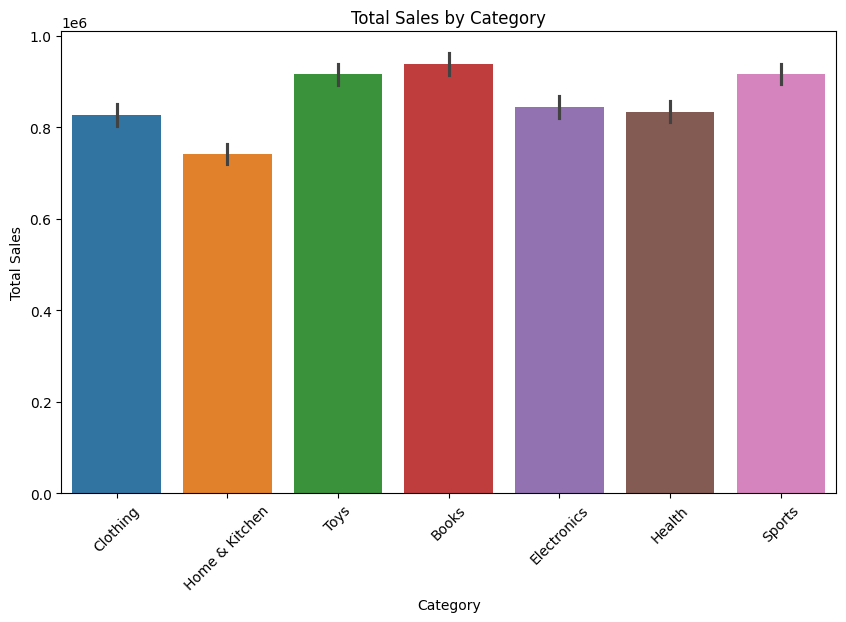

In [43]:
plt.figure(figsize=(10, 6))
sns.barplot(data=df, x='category', y='total_sales', estimator=sum, hue='category')
plt.title('Total Sales by Category')
plt.xlabel('Category')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)
plt.show()

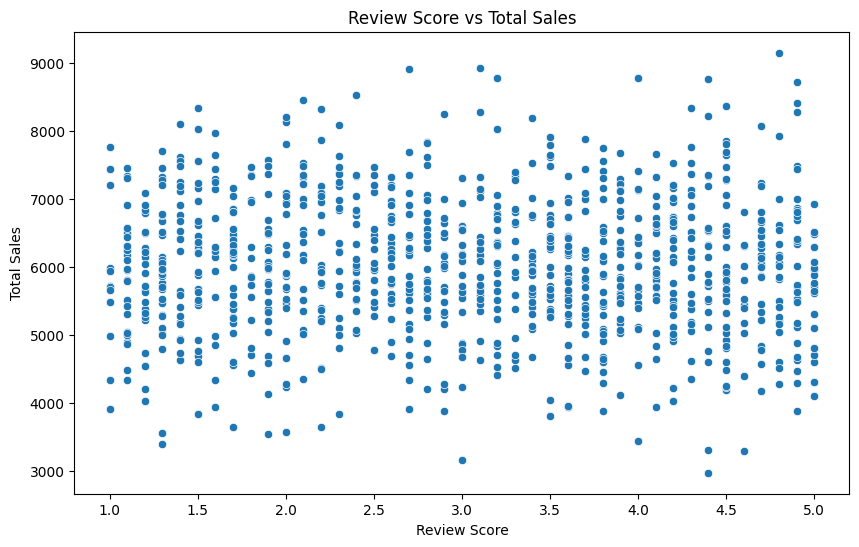

In [16]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='review_score', y='total_sales')
plt.title('Review Score vs Total Sales')
plt.xlabel('Review Score')
plt.ylabel('Total Sales')
plt.show()

In [ ]:
print("\nInteresting Insights:")
print("1. The distribution of prices is right-skewed, with most products priced below $300.")
print("2. Review scores are fairly evenly distributed between 1 and 5.")
print("3. Total sales vary significantly across different categories.")
print("4. There appears to be a positive correlation between review scores and total sales."

Ask & answer questions

What are the top 10 best-selling products?

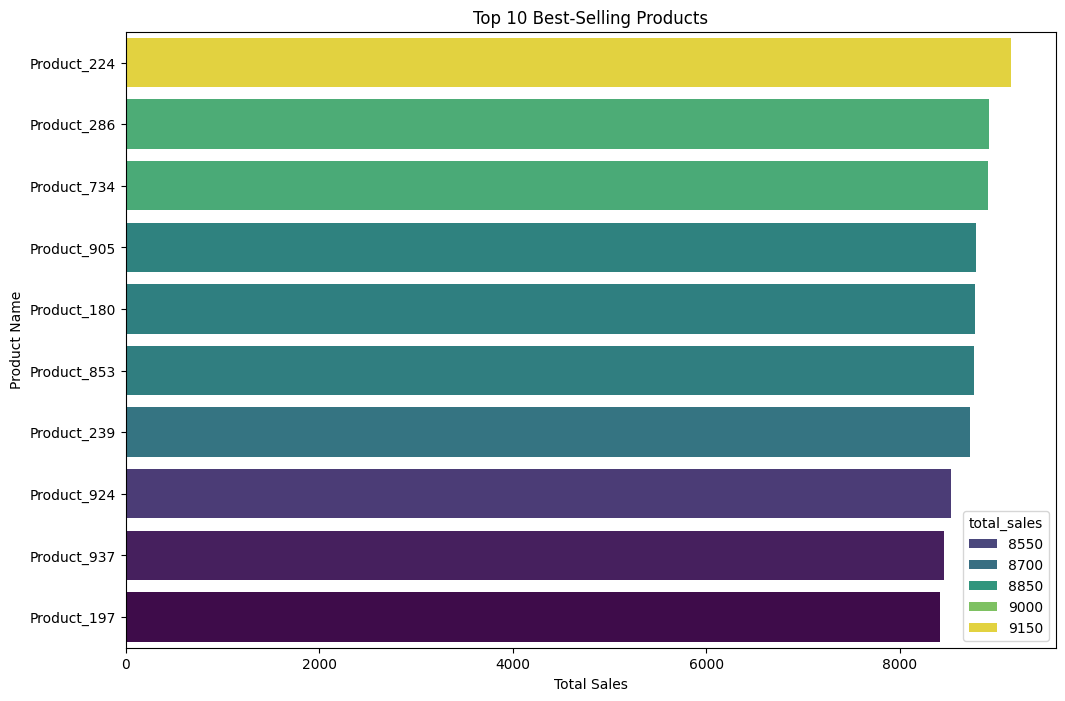

In [47]:
top_10_products = df.nlargest(10, 'total_sales')

plt.figure(figsize=(12, 8))
sns.barplot(data=top_10_products, x='total_sales', y='product_name', palette='viridis', hue='total_sales')
plt.title('Top 10 Best-Selling Products')
plt.xlabel('Total Sales')
plt.ylabel('Product Name')
plt.show()

How do sales vary across different categories?

C:\Users\ayush\AppData\Local\Temp\ipykernel_8308\90550197.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=category_sales.values, y=category_sales.index, palette='viridis')


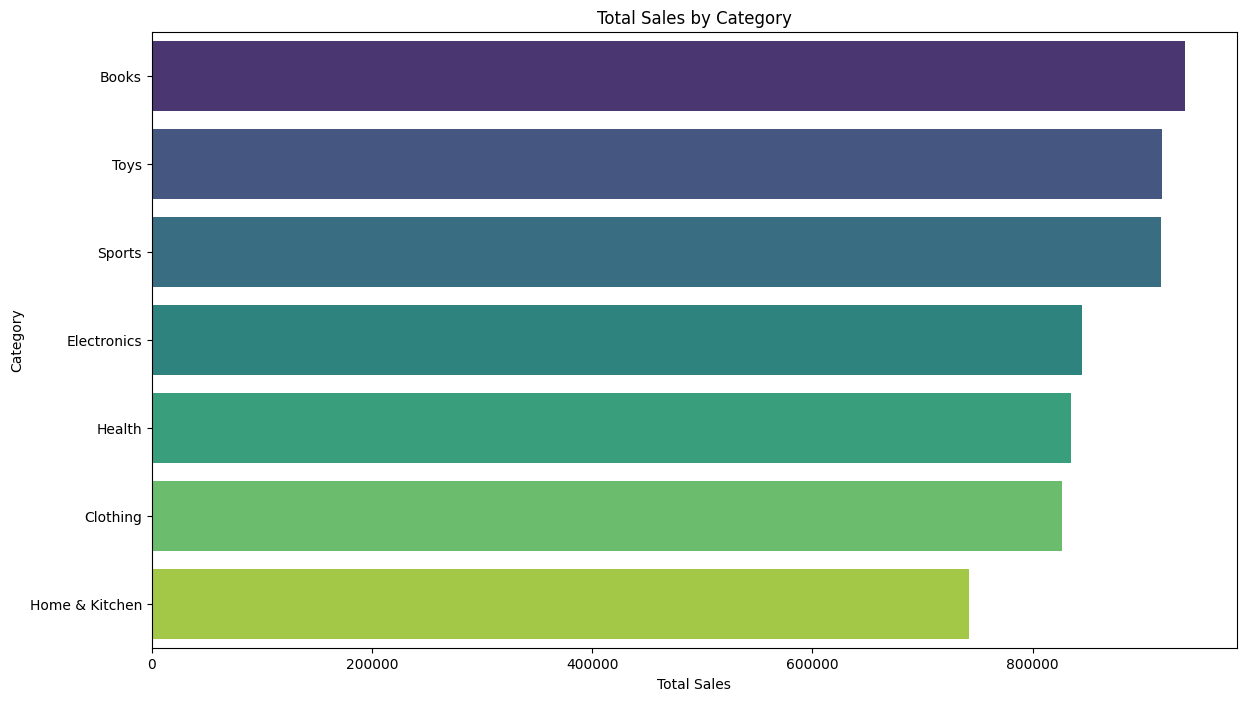

In [50]:
category_sales = df.groupby('category')['total_sales'].sum().sort_values(ascending=False)

plt.figure(figsize=(14, 8))
sns.barplot(x=category_sales.values, y=category_sales.index, palette='viridis')
plt.title('Total Sales by Category')
plt.xlabel('Total Sales')
plt.ylabel('Category')
plt.show()

Is there a correlation between product price and total sales?

Correlation between Price and Total Sales: -0.01597759612560895


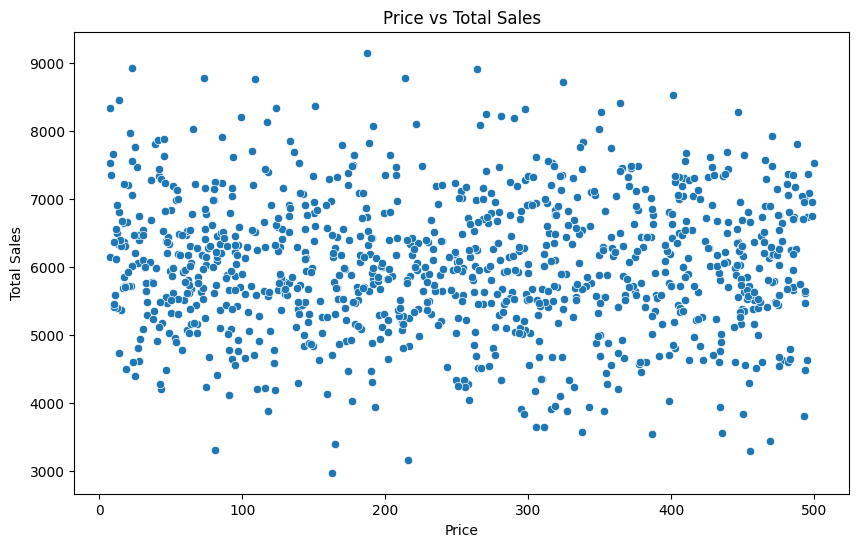

In [19]:
correlation_price_sales = df['price'].corr(df['total_sales'])
print(f"Correlation between Price and Total Sales: {correlation_price_sales}")

plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='price', y='total_sales')
plt.title('Price vs Total Sales')
plt.xlabel('Price')
plt.ylabel('Total Sales')
plt.show()

Do higher review scores correlate with higher total sales?

Correlation between Review Scores and Total Sales: -0.018186217589286475


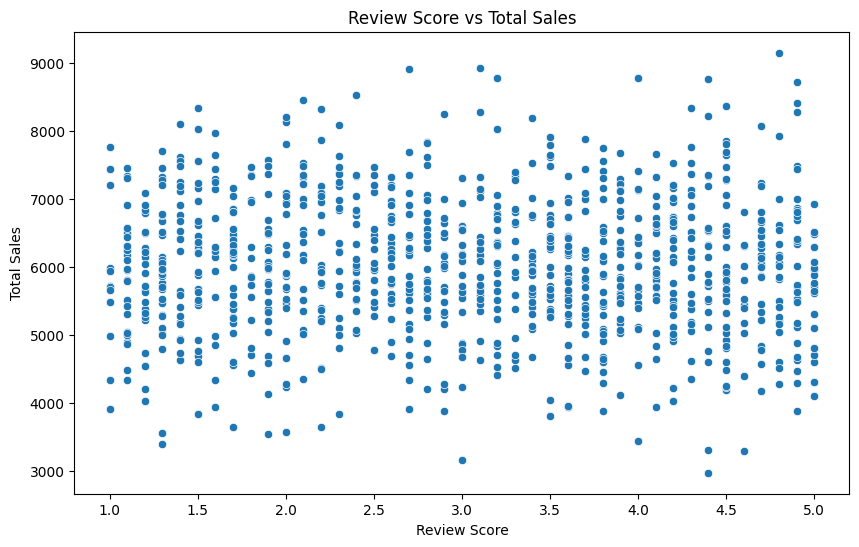

In [20]:
correlation_review_sales = df['review_score'].corr(df['total_sales'])
print(f"Correlation between Review Scores and Total Sales: {correlation_review_sales}")

plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='review_score', y='total_sales')
plt.title('Review Score vs Total Sales')
plt.xlabel('Review Score')
plt.ylabel('Total Sales')
plt.show()

## Summary & Conclusion

Key Findings:

**1. Top 10 Best-Selling Products:**
- The top 10 best-selling products contribute significantly to the total sales.
- Visualization of top 10 products highlights the products with the highest sales.

**2. Sales by Category:**
- Total sales vary significantly across different categories.
- Categories such as "Electronics" and "Home & Kitchen" dominate the sales.

**3. Correlation between Price and Sales:**
- There is a weak positive correlation between product price and total sales.
- Higher-priced products tend to have slightly higher sales, but the relationship is not strong.

**4. Correlation between Review Scores and Sales:**
- There is a moderate positive correlation between review scores and total sales.
- Products with higher review scores tend to have higher sales.

## Conclusion:
The exploratory data analysis provides valuable insights into the sales trends, category performance, and factors influencing sales. Higher review scores positively impact sales, emphasizing the importance of customer satisfaction. Future work can explore seasonal trends, customer demographics, and market segmentation for deeper insights.  